# 1. Data Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Import data

In [3]:
df = pd.read_csv('housing.csv')

In [4]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
# 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
mhv_df = df['median_house_value']
df.drop(['median_house_value'], axis=1, inplace=True)

In [9]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


# 2. Data Preparation

### Correlation analysis
#### - Since the correlation coefficient between all data and "Class" is 0.4 or higher, all columns are used.

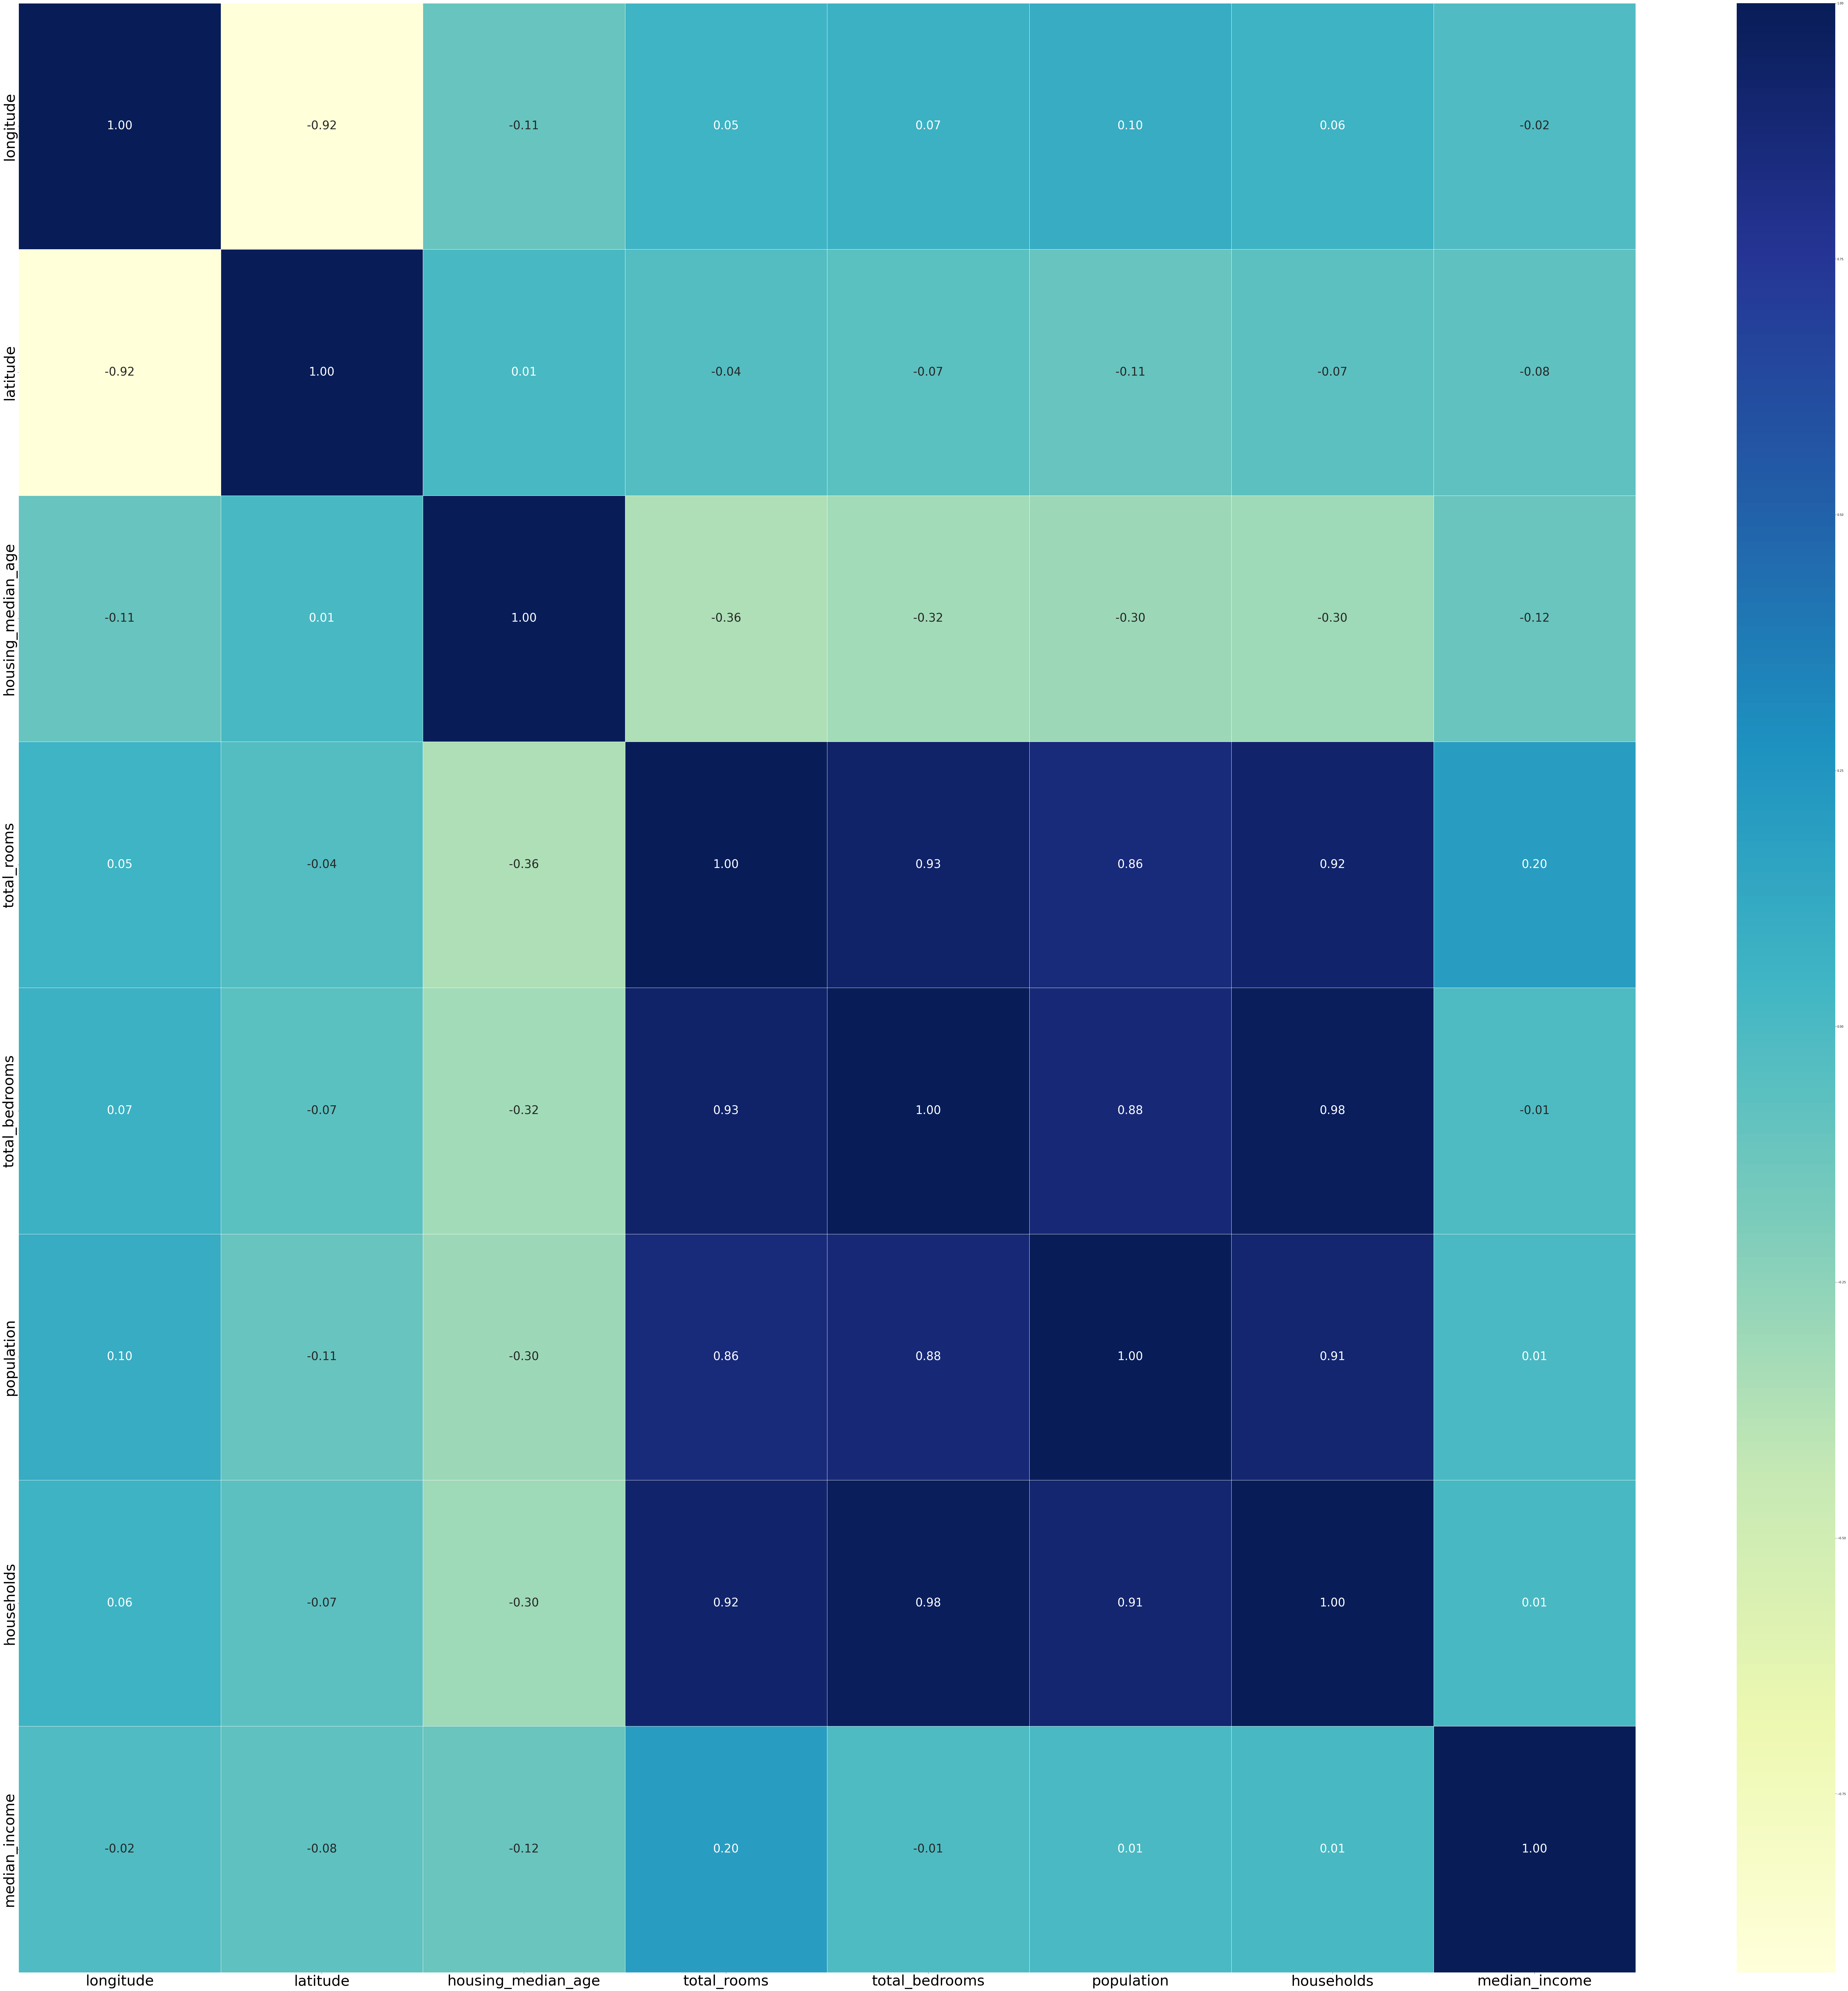

In [10]:
fig, ax = plt.subplots(figsize=(125,125))
sns.heatmap(df.corr(), annot=True, annot_kws={'size':40}, fmt='0.2f', cmap="YlGnBu", linewidths=0.5)
ax.tick_params(axis='both', labelsize=50);
plt.show()

# 3. Main functions

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, LabelEncoder, OneHotEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import cluster, silhouette_samples, silhouette_score
from scipy.optimize import linear_sum_assignment

from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.mixture import GaussianMixture
from pyclustering.utils import timedcall
from pyclustering.cluster.clarans import clarans
from pyclustering.cluster.silhouette import silhouette
from pyclustering.cluster import cluster_visualizer
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RandomizedSearchCV

# Preprocessing

In [12]:
def encoding(encoder, dataset):
    e = None
    d = dataset
    
    if encoder == 'LabelEncoder':
        e = LabelEncoder()
    elif encoder == 'OneHotEncoder':
        e = OneHotEncoder()
    else:
        raise NameError('encoder {} is not defined'.format(encoder))
            
    object_col = d.select_dtypes(include='object').columns
    d[object_col] = d[object_col].apply(e.fit_transform)
    
    return d

In [13]:
def scaling(scaler, dataset):
    s = None
    
    if scaler == 'StandardScaler':
        s = StandardScaler()
    elif scaler == 'MinMaxScaler':
        s = MinMaxScaler()
    elif scaler == 'MaxAbsScaler':
        s = MaxAbsScaler()
    elif scaler == 'RobustScaler':
        s = RobustScaler()
    elif scaler == 'Normalizer':
        s = Normalizer()
    else:
        raise NameError('scaler {} is not defined'.format(scaler))
        
    return s.fit_transform(dataset)

# Learning

In [39]:
def sk_learning(model_name, dataset_list):
    
    # Model learning
    for dataset_dict in dataset_list:
        dataset = dataset_dict['dataset']
        
        labels_list = [] # labels with all k
        distortions = [] # elbow
        silhouette_avg = [] # silhouette
        gmm_scores = [] # gmm(log-likelihood)
        
        # Run with all k
        K = range(2,13)
        for k in K:
            if model_name == 'KMeans':
                model = KMeans(n_clusters=k) 
            elif model_name == 'GaussianMixture':
                model = GaussianMixture(n_components=k)
            elif model_name == 'DBSCAN':
                model = DBSCAN(min_samples=k, eps=0.2)
            elif model_name == 'OPTICS':
                model = OPTICS(min_samples=k)
            else:
                raise NameError('model {} is not defined'.format(model_name))
                
            # model fit and predict
            # get labels
            labels = model.fit_predict(dataset)
            labels_list.append(labels)
            
            # get elbow or silhouette score
            if model_name == 'KMeans':
                distortions.append(model.inertia_)
                silhouette_avg.append(silhouette_score(dataset, model.labels_))
            elif model_name == 'DBSCAN' or model_name == 'OPTICS':
                silhouette_avg.append(silhouette_score(dataset, model.labels_))
            elif model_name == 'GaussianMixture':
                gmm_scores.append(model.score(dataset))
                

        # print model information
        print(model_name, dataset_dict['scaler'], dataset_dict['encoder'])
        
        # plot the result
        # plot elbow (KMeans)
        if model_name == 'KMeans':
            plot_elbow(K, distortions)
            
        # plot silhouette score(except GMM)
        best_index = 0
        if model_name == 'GaussianMixture':
            best_score = max(gmm_scores)
            best_index = gmm_scores.index(best_score)
            
            print('GMM best score(log-likelihood):', best_score)
            print('GMM best k:', best_index+2)
        else:
            plot_silhouette(K, silhouette_avg)
            
            best_score = max(silhouette_avg)
            best_index = silhouette_avg.index(best_score)
            
            print('silouette best score:', best_score)
            print('silouette best k:', best_index+2)
            
        # plot cluster(2D & 3D)
        if(len(dataset[0]) < 4):
            plot_cluster(labels_list[best_index], dataset)
        print()
        
    print('-----------------------------------------------------------------------')

In [15]:
def clarans_learning(dataset_list):

    # Model learning
    for dataset_dict in dataset_list:
        dataset = dataset_dict['dataset']
        
        labels_list = [] # labels with all k
        silhouette_avg = [] # silhouette
        
        # Run with all k
        K = range(2,13)
        for k in K:
            df_clarans = clarans(dataset, k, 1, 1)
            df_clarans.process()
            
            df_medoids = df_clarans.get_medoids()
            df_cluster = df_clarans.get_clusters()
            labels_list.append(df_cluster)
            
            # get silhouette score
            score = silhouette(dataset, df_cluster).process().get_score()
            silhouette_avg.append(np.nanmean(score))
  
        # print model information
        print('clarans', dataset_dict['scaler'], dataset_dict['encoder'])
    
        # plot silhouette score
        plot_silhouette(K, silhouette_avg)
        
        best_score = max(silhouette_avg)
        best_index = silhouette_avg.index(best_score)
        
        print('silouette best score:', best_score)
        print('silouette best k:', best_index+2)
        
        #plot cluster (2D & 3D)
        if(len(dataset[0]) < 4):
            visualizer = cluster_visualizer()
            visualizer.append_clusters(labels_list[best_index], dataset)
            visualizer.show()
        print()
        
    print('-----------------------------------------------------------------------')

# Plot

In [16]:
def plot_elbow(K, distortions):
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal K')
    plt.show()

In [17]:
def plot_silhouette(K, silhouette_avg):
    plt.plot(K, silhouette_avg, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.title('Silhoutte analysis For Optimal k')
    plt.show()

In [18]:
def plot_cluster(label, dataset):   
    labels = np.unique(label)
    # plot 2d or 3d
    if len(dataset[0]) == 2:
        for i in labels:
            plt.scatter(dataset[label == i, 0], dataset[label == i, 1], label = i)
    else:
        plt.axes(projection='3d')
        for i in labels:
            plt.scatter(dataset[label == i, 0], dataset[label == i, 1], dataset[label == i, 2], label = i)        
    
    plt.show()

# AutoML Function

In [19]:
def AutoML(scaler_list, encoder_list, model_list, dataset):
    dataset_list = []
    
    # scaling and encoding the dataset
    for scaler in scaler_list:
        for encoder in encoder_list:
            temp = {}
            # Encoding
            e_dataset = encoding(encoder, dataset)
            temp['encoder'] = encoder
                
            # Scaling
            s_dataset = scaling(scaler, e_dataset)
            temp['scaler'] = scaler
            temp['dataset'] = s_dataset
            
            dataset_list.append(temp)
                
        
    # Modle learning
    for model_name in model_list:
        if model_name == 'clarans':
            clarans_learning(dataset_list)
        else:
            sk_learning(model_name, dataset_list)
                

# Run AutoML

##################################################################

Index(['total_rooms', 'total_bedrooms'], dtype='object')

##################################################################
KMeans StandardScaler LabelEncoder


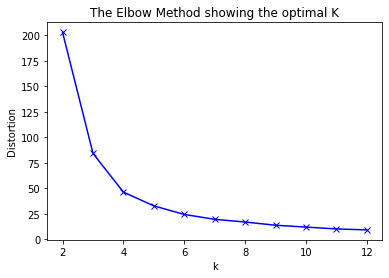

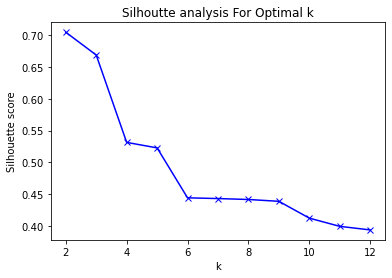

silouette best score: 0.7042519083557607
silouette best k: 2


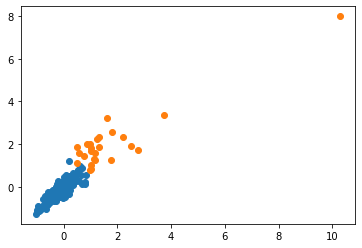


KMeans StandardScaler OneHotEncoder


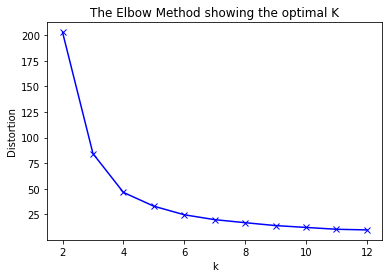

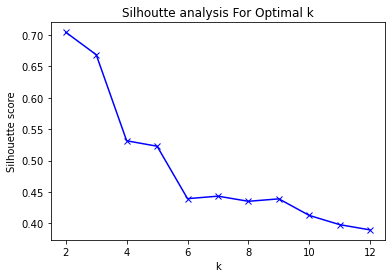

silouette best score: 0.7042519083557607
silouette best k: 2


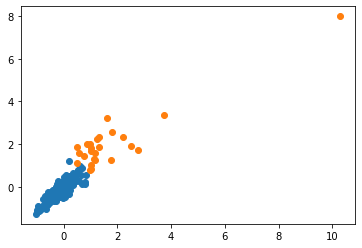


KMeans MinMaxScaler LabelEncoder


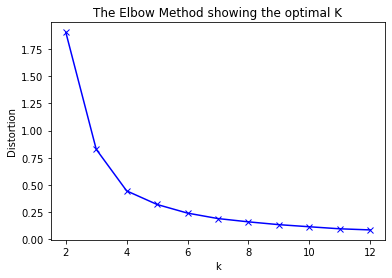

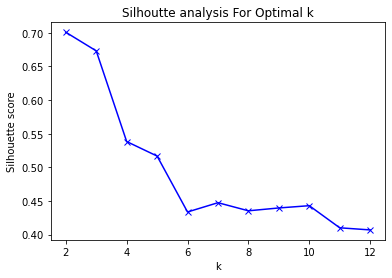

silouette best score: 0.7009184190153896
silouette best k: 2


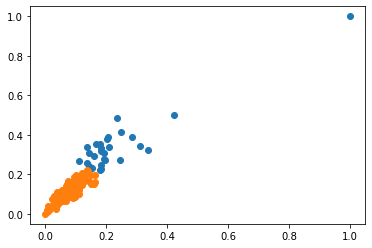


KMeans MinMaxScaler OneHotEncoder


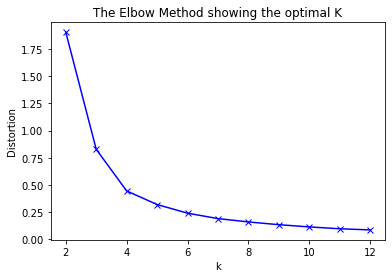

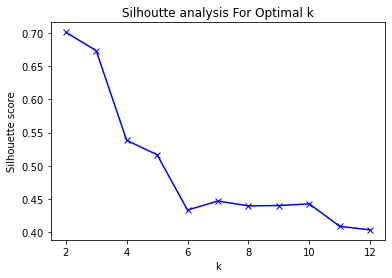

silouette best score: 0.7009184190153896
silouette best k: 2


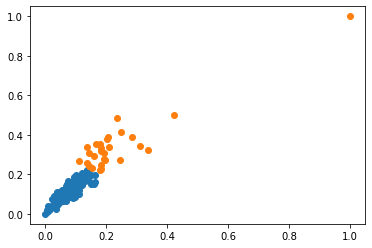


KMeans RobustScaler LabelEncoder


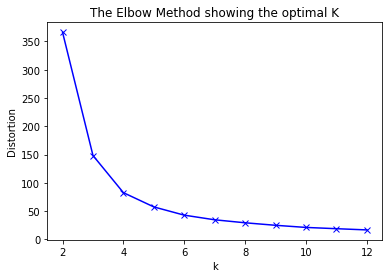

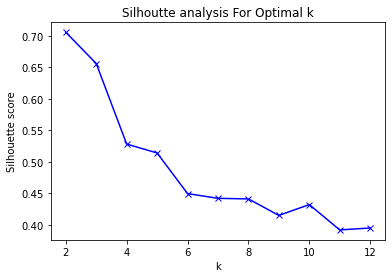

silouette best score: 0.7059767704333424
silouette best k: 2


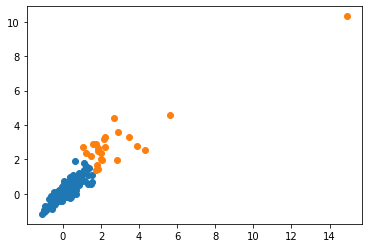


KMeans RobustScaler OneHotEncoder


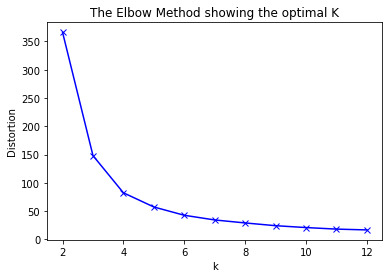

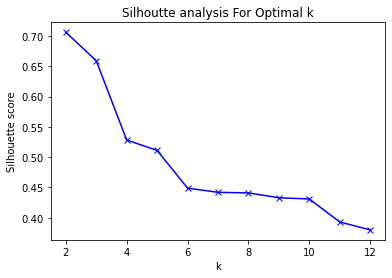

silouette best score: 0.7059767704333424
silouette best k: 2


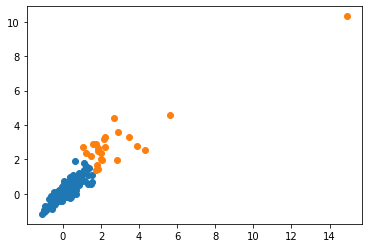


-----------------------------------------------------------------------
GaussianMixture StandardScaler LabelEncoder
GMM best score(log-likelihood): -0.46580176006625024
GMM best k: 12


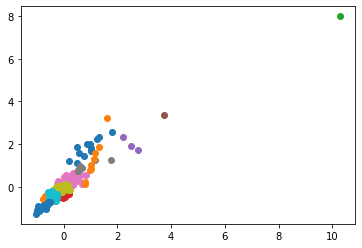


GaussianMixture StandardScaler OneHotEncoder
GMM best score(log-likelihood): -0.44322119076325
GMM best k: 12


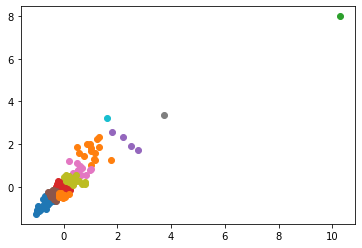


GaussianMixture MinMaxScaler LabelEncoder
GMM best score(log-likelihood): 4.133460257948266
GMM best k: 12


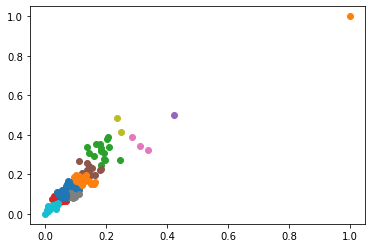


GaussianMixture MinMaxScaler OneHotEncoder
GMM best score(log-likelihood): 4.167171051934687
GMM best k: 11


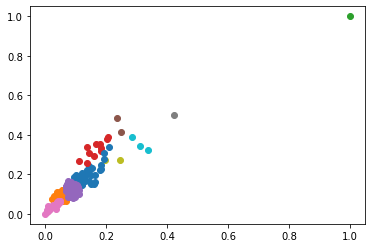


GaussianMixture RobustScaler LabelEncoder
GMM best score(log-likelihood): -0.9896065566095539
GMM best k: 11


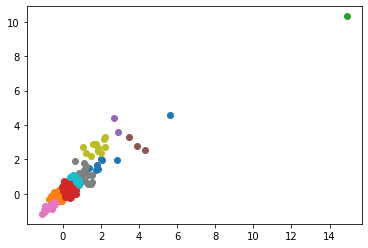


GaussianMixture RobustScaler OneHotEncoder
GMM best score(log-likelihood): -0.9784593607883423
GMM best k: 12


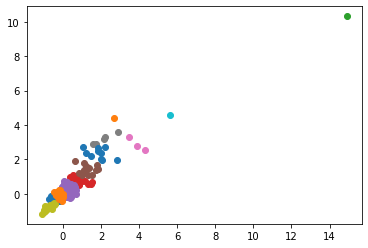


-----------------------------------------------------------------------
clarans StandardScaler LabelEncoder


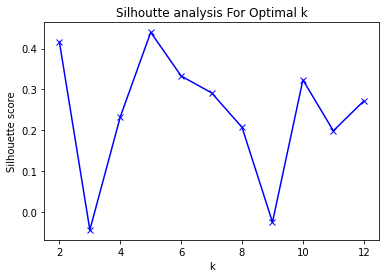

silouette best score: 0.4399249510347146
silouette best k: 5


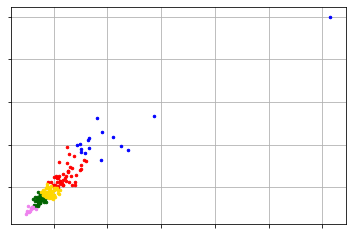


clarans StandardScaler OneHotEncoder


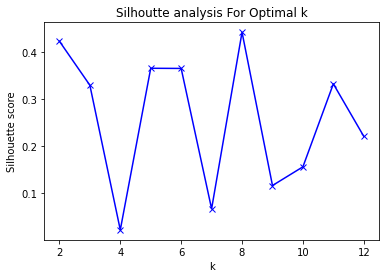

silouette best score: 0.4415488423650032
silouette best k: 8


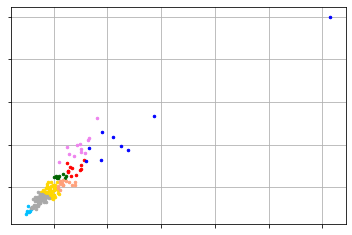


clarans MinMaxScaler LabelEncoder


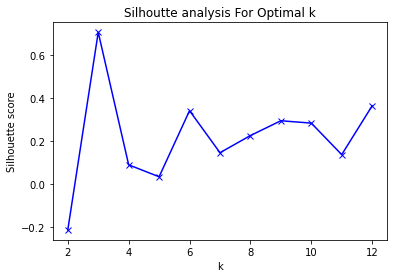

silouette best score: 0.707131874495101
silouette best k: 3


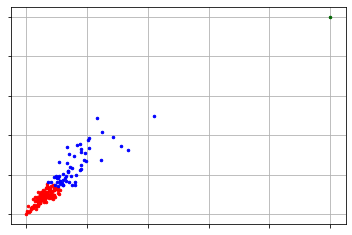


clarans MinMaxScaler OneHotEncoder


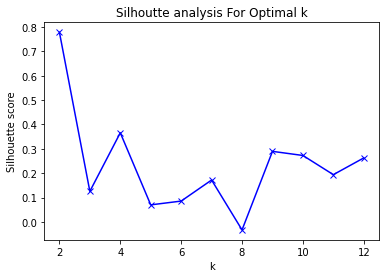

silouette best score: 0.7790150759650604
silouette best k: 2


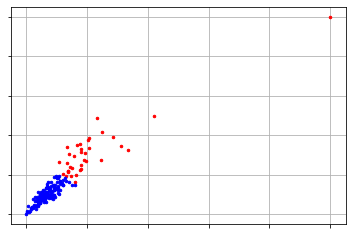


clarans RobustScaler LabelEncoder


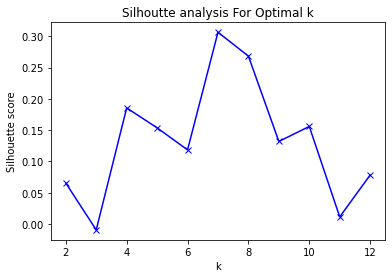

silouette best score: 0.3064988150301628
silouette best k: 7


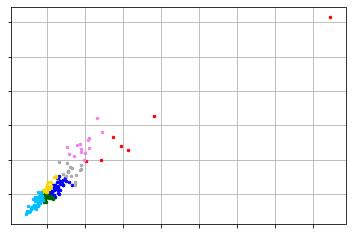


clarans RobustScaler OneHotEncoder


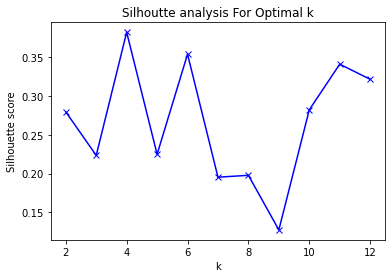

silouette best score: 0.38235995803588335
silouette best k: 4


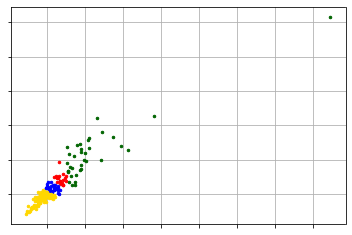


-----------------------------------------------------------------------
DBSCAN StandardScaler LabelEncoder


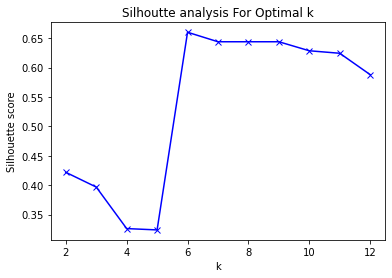

silouette best score: 0.6601037658825848
silouette best k: 6


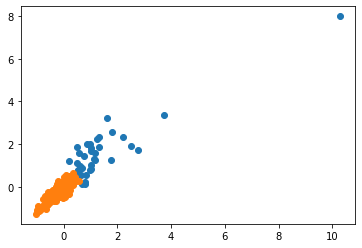


DBSCAN StandardScaler OneHotEncoder


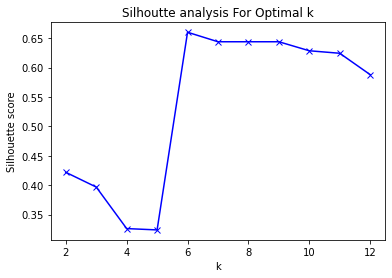

silouette best score: 0.6601037658825848
silouette best k: 6


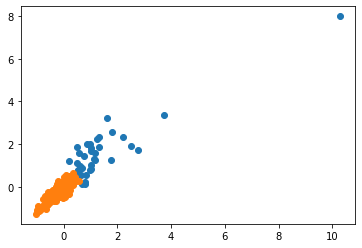


DBSCAN MinMaxScaler LabelEncoder


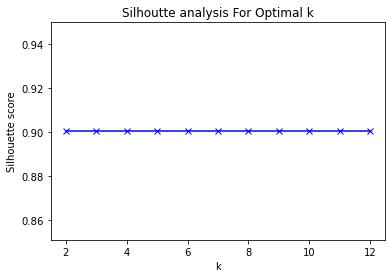

silouette best score: 0.9004616501335936
silouette best k: 2


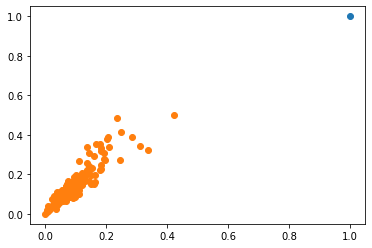


DBSCAN MinMaxScaler OneHotEncoder


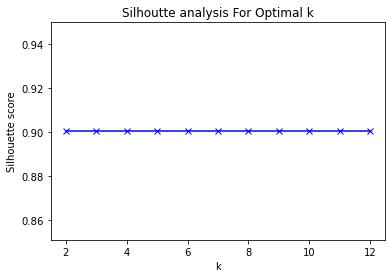

silouette best score: 0.9004616501335936
silouette best k: 2


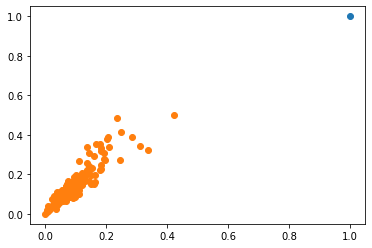


DBSCAN RobustScaler LabelEncoder


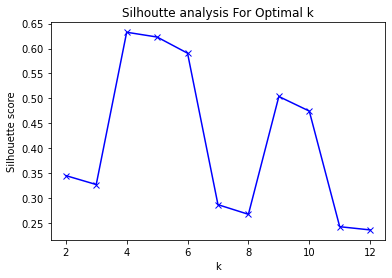

silouette best score: 0.6327410070949387
silouette best k: 4


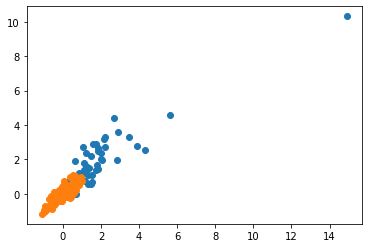


DBSCAN RobustScaler OneHotEncoder


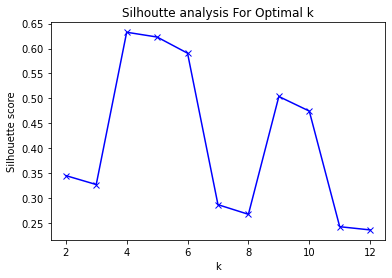

silouette best score: 0.6327410070949387
silouette best k: 4


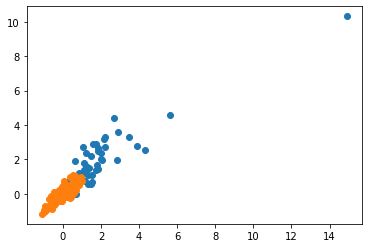


-----------------------------------------------------------------------
OPTICS StandardScaler LabelEncoder


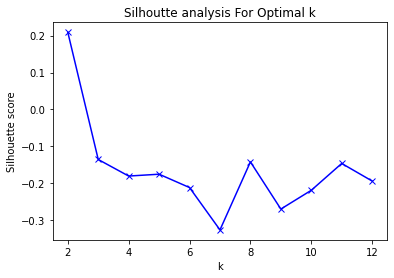

silouette best score: 0.20888606464216278
silouette best k: 2


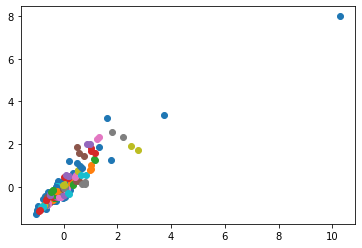


OPTICS StandardScaler OneHotEncoder


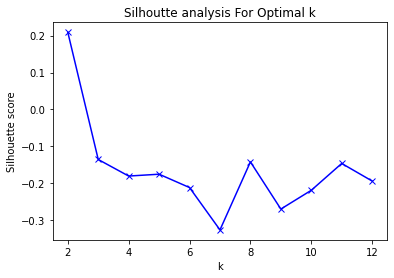

silouette best score: 0.20888606464216278
silouette best k: 2


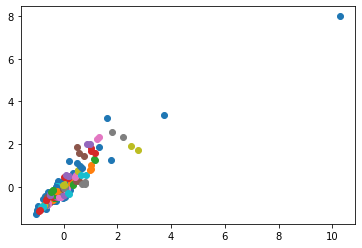


OPTICS MinMaxScaler LabelEncoder


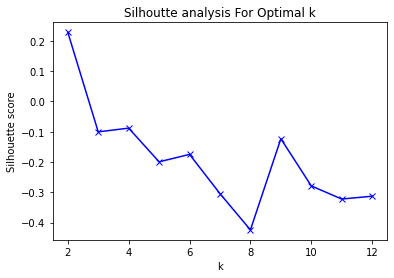

silouette best score: 0.22833616500081141
silouette best k: 2


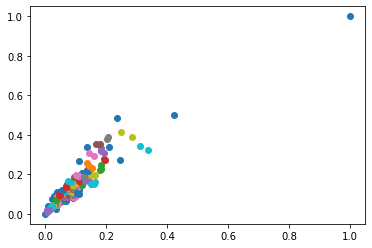


OPTICS MinMaxScaler OneHotEncoder


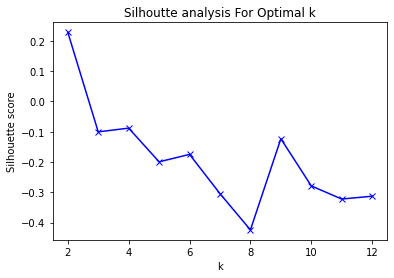

silouette best score: 0.22833616500081141
silouette best k: 2


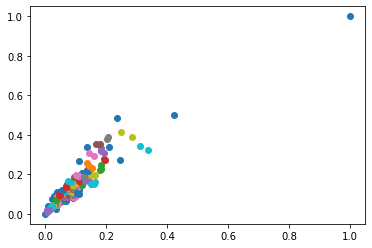


OPTICS RobustScaler LabelEncoder


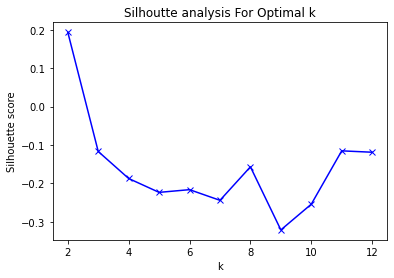

silouette best score: 0.1935500851180414
silouette best k: 2


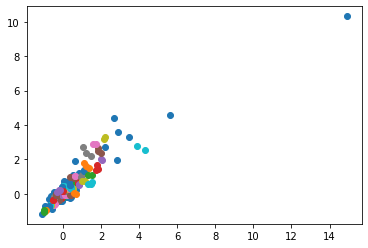


OPTICS RobustScaler OneHotEncoder


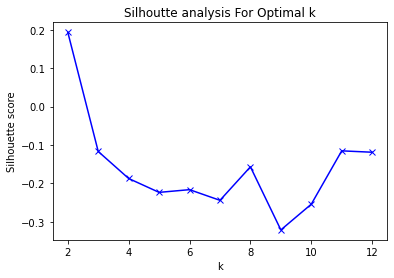

silouette best score: 0.1935500851180414
silouette best k: 2


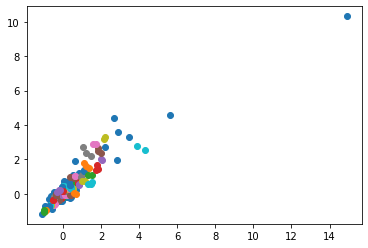


-----------------------------------------------------------------------
##################################################################

Index(['population', 'households'], dtype='object')

##################################################################
KMeans StandardScaler LabelEncoder


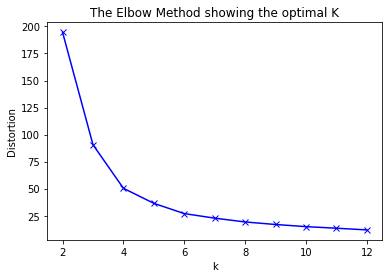

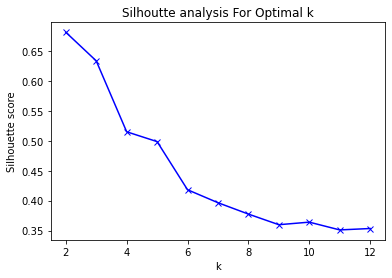

silouette best score: 0.6817590109139126
silouette best k: 2


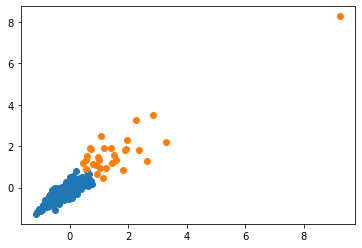


KMeans StandardScaler OneHotEncoder


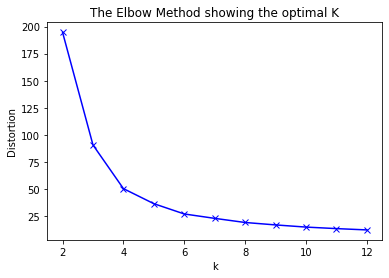

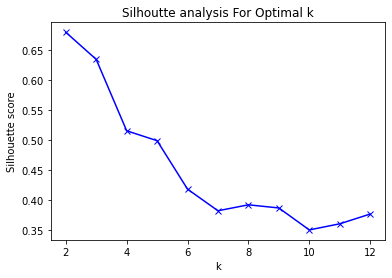

silouette best score: 0.6790312387631209
silouette best k: 2


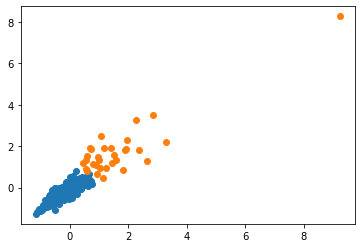


KMeans MinMaxScaler LabelEncoder


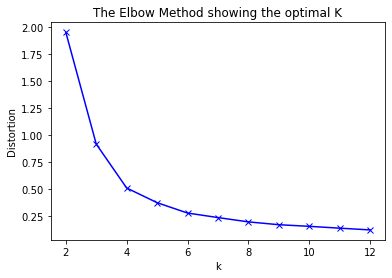

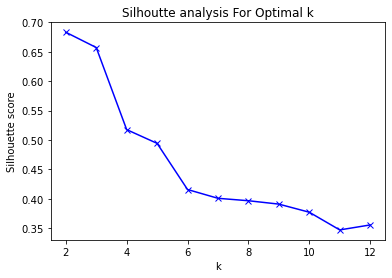

silouette best score: 0.6833039228039465
silouette best k: 2


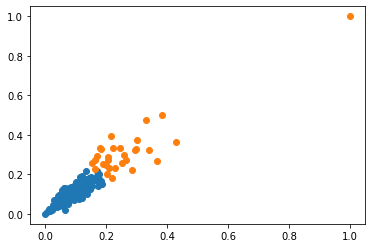


KMeans MinMaxScaler OneHotEncoder


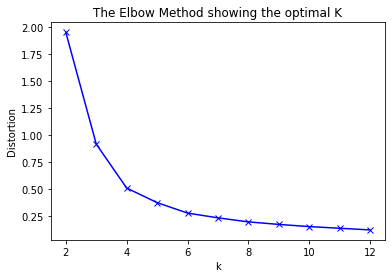

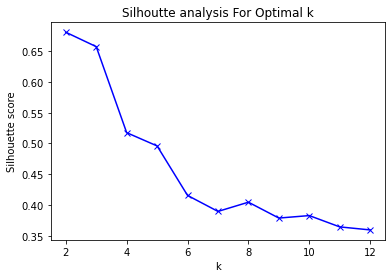

silouette best score: 0.6807033293964433
silouette best k: 2


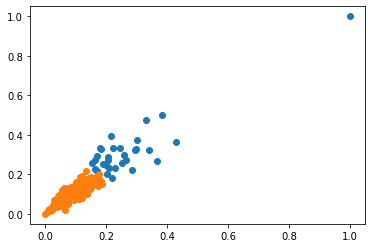


KMeans RobustScaler LabelEncoder


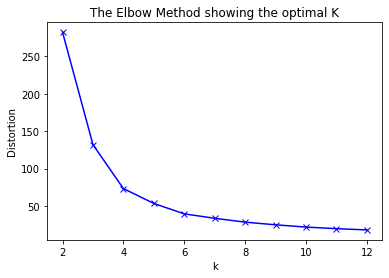

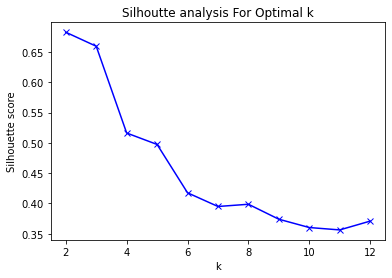

silouette best score: 0.6824013359246726
silouette best k: 2


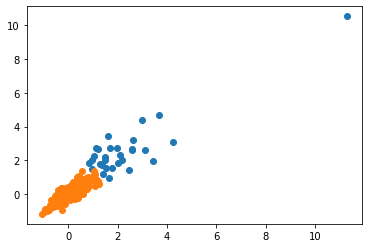

KeyboardInterrupt: 

In [55]:
scaler_list = ['StandardScaler', 'MinMaxScaler', 'RobustScaler']
encoder_list = ['LabelEncoder', 'OneHotEncoder']
model_list = ['KMeans', 'GaussianMixture', 'clarans', 'DBSCAN', 'OPTICS']

train, test = train_test_split(df, train_size=0.01) # data size

# features
data_list = []
data_list.append(train[['total_rooms', 'total_bedrooms']])
data_list.append(train[['population', 'households']])
data_list.append(train[['total_rooms', 'population', 'households']])
data_list.append(train[['total_rooms', 'total_bedrooms', 'population', 'households']])

# AutoML
for data in data_list:
    print('##################################################################')
    print()
    print(data.columns)
    print()
    print('##################################################################')
    AutoML(scaler_list, encoder_list, model_list, data)